In [449]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [450]:
data=pd.read_csv('MNC_Salaries.csv')

In [451]:
data.head(5)

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [452]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
Name        457 non-null object
Team        457 non-null object
Number      457 non-null int64
Position    457 non-null object
Age         457 non-null int64
DOJ         457 non-null object
Weight      457 non-null int64
College     373 non-null object
Salary      446 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [453]:
data.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [454]:
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

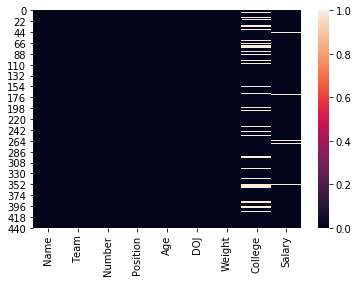

In [455]:
sns.heatmap(data.isnull())

In [456]:
data["Salary"].fillna(data.groupby("Position")["Salary"].transform("median"), inplace=True)

In [457]:
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary       0
dtype: int64

Visualization

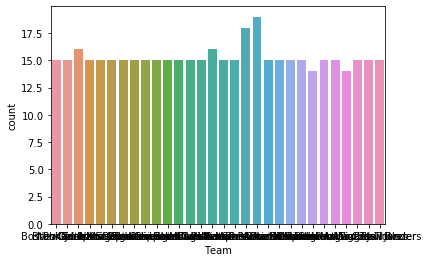

In [458]:
sns.countplot(x='Team',data=data)

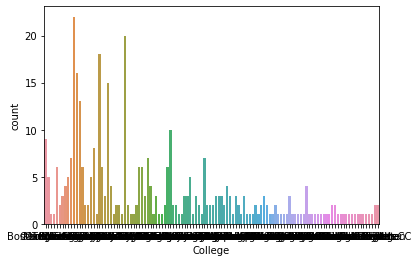

In [459]:
sns.countplot(x='College',data=data)

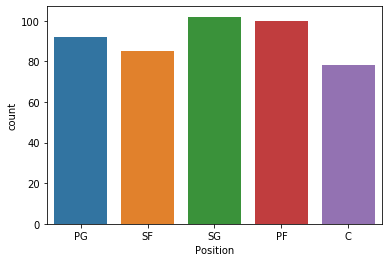

In [460]:
sns.countplot(x='Position',data=data)

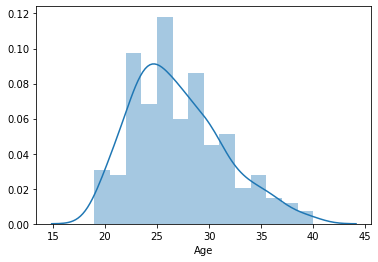

In [461]:
sns.distplot(data['Age'].dropna())

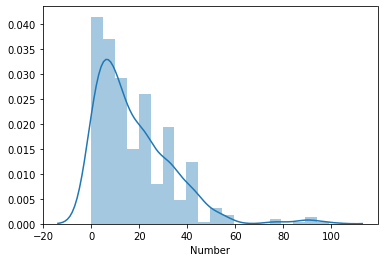

In [462]:
sns.distplot(data['Number'].dropna())

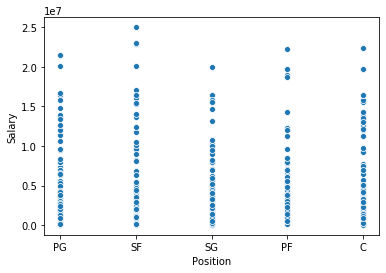

In [463]:
ax=sns.scatterplot(x='Position',y='Salary',data=data)

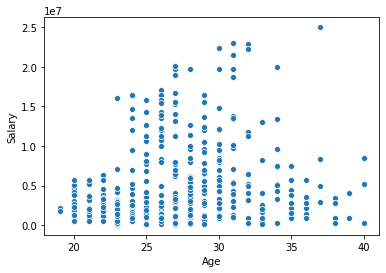

In [464]:
ax=sns.scatterplot(x='Age',y='Salary',data=data)

In [465]:
data.head(2)

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0


In [466]:
print(data['Position'].unique())
print(data['Team'].unique())

['PG' 'SF' 'SG' 'PF' 'C']
['Boston Celtics' 'Brooklyn Nets' 'New York Knicks' 'Philadelphia 76ers'
 'Toronto Raptors' 'Golden State Warriors' 'Los Angeles Clippers'
 'Los Angeles Lakers' 'Phoenix Suns' 'Sacramento Kings' 'Chicago Bulls'
 'Cleveland Cavaliers' 'Detroit Pistons' 'Indiana Pacers'
 'Milwaukee Bucks' 'Dallas Mavericks' 'Houston Rockets'
 'Memphis Grizzlies' 'New Orleans Pelicans' 'San Antonio Spurs'
 'Atlanta Hawks' 'Charlotte Hornets' 'Miami Heat' 'Orlando Magic'
 'Washington Wizards' 'Denver Nuggets' 'Minnesota Timberwolves'
 'Oklahoma City Thunder' 'Portland Trail Blazers' 'Utah Jazz']


In [467]:
from sklearn.preprocessing import LabelEncoder
labelquality = LabelEncoder()

In [468]:
data['Position'] = labelquality.fit_transform(data['Position'])
data['Team'] = labelquality.fit_transform(data['Team'])

In [469]:
data['Position'].value_counts()
#data['Team'].value_counts()

4    102
1    100
2     92
3     85
0     78
Name: Position, dtype: int64

In [470]:
data['Team'].value_counts()

18    19
14    18
19    16
16    16
12    15
1     15
2     15
3     15
4     15
5     15
6     15
7     15
8     15
9     15
10    15
11    15
29    15
13    15
28    15
15    15
20    15
22    15
23    15
24    15
25    15
26    15
27    15
0     15
17    14
21    14
Name: Team, dtype: int64

In [471]:
data.head(2)

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,1,0,2,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,1,99,3,25,06-Jun,235,Marquette,6796117.0


In [472]:
data.drop(['Name','DOJ','Weight','College'],axis=1,inplace=True)

In [473]:
data.corr()

,Team,Number,Position,Age,Salary
Team,1.000000,-0.054748,-0.009638,-0.042344,-0.036017
Number,-0.054748,1.000000,-0.177229,0.028724,-0.111309
Position,-0.009638,-0.177229,1.000000,-0.062992,-0.097421
Age,-0.042344,0.028724,-0.062992,1.000000,0.207929
Salary,-0.036017,-0.111309,-0.097421,0.207929,1.000000


In [474]:
data.head(2)

,Team,Number,Position,Age,Salary
0,1,0,2,25,7730337.0
1,1,99,3,25,6796117.0


In [475]:
df=pd.DataFrame(data)

In [476]:
df['Position']=df['Position'].astype(int)
df['Salary']=df['Salary'].astype(int)

In [477]:
feature=data.iloc[:,2:-2].values
labels=data.iloc[:,-1].values

In [478]:
print(feature)

[[2]
 [3]
 [4]
 [4]
 [1]
 [1]
 [1]
 [0]
 [2]
 [2]
 [0]
 [2]
 [4]
 [4]
 [0]
 [4]
 [4]
 [4]
 [4]
 [2]
 [4]
 [4]
 [2]
 [0]
 [1]
 [1]
 [1]
 [0]
 [2]
 [1]
 [4]
 [1]
 [3]
 [3]
 [2]
 [3]
 [4]
 [2]
 [0]
 [1]
 [1]
 [0]
 [3]
 [4]
 [1]
 [4]
 [1]
 [2]
 [3]
 [0]
 [3]
 [1]
 [1]
 [2]
 [2]
 [1]
 [0]
 [2]
 [4]
 [4]
 [1]
 [0]
 [3]
 [3]
 [4]
 [1]
 [2]
 [2]
 [0]
 [1]
 [4]
 [3]
 [1]
 [1]
 [0]
 [2]
 [4]
 [3]
 [0]
 [4]
 [2]
 [0]
 [1]
 [3]
 [2]
 [3]
 [3]
 [3]
 [0]
 [4]
 [1]
 [0]
 [1]
 [4]
 [3]
 [3]
 [1]
 [3]
 [0]
 [1]
 [2]
 [3]
 [2]
 [4]
 [2]
 [4]
 [1]
 [0]
 [3]
 [3]
 [2]
 [0]
 [2]
 [1]
 [1]
 [1]
 [2]
 [0]
 [4]
 [3]
 [3]
 [2]
 [4]
 [3]
 [0]
 [4]
 [4]
 [2]
 [0]
 [1]
 [2]
 [2]
 [1]
 [3]
 [3]
 [0]
 [3]
 [4]
 [4]
 [3]
 [3]
 [0]
 [2]
 [0]
 [4]
 [1]
 [3]
 [0]
 [4]
 [1]
 [2]
 [1]
 [2]
 [4]
 [4]
 [1]
 [0]
 [1]
 [4]
 [3]
 [1]
 [4]
 [0]
 [1]
 [2]
 [3]
 [2]
 [1]
 [2]
 [3]
 [3]
 [4]
 [4]
 [0]
 [1]
 [4]
 [0]
 [4]
 [4]
 [0]
 [2]
 [0]
 [0]
 [2]
 [2]
 [3]
 [4]
 [2]
 [0]
 [3]
 [3]
 [2]
 [3]
 [4]
 [1]
 [1]
 [1]
 [1]
 [4]
 [3]


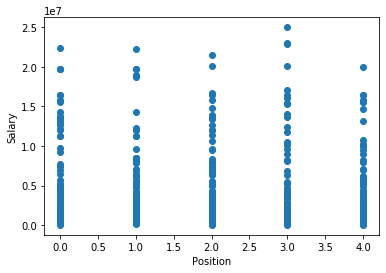

In [479]:
plt.scatter(feature,labels)
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

Simple Linear Regression

In [480]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(feature,labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

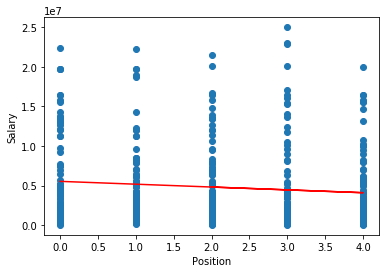

In [481]:
plt.scatter(feature,labels)
plt.plot(feature,lr.predict(feature),c='r')
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [482]:
print("R^2 score for Linear Regresion: ", lr.score(feature,labels))

R^2 score for Linear Regresion:  0.009490837576253797


Polynomial Regression

In [483]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree=3)
poly_feature= poly_reg.fit_transform(feature)

In [484]:
poly_reg.fit(poly_feature,labels)
poly_reg_new = LinearRegression()
poly_reg_new.fit(poly_feature,labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

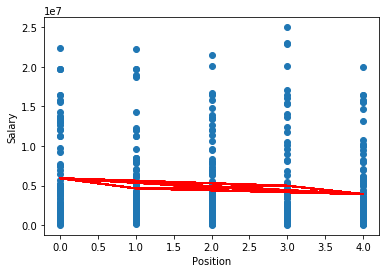

In [485]:
plt.scatter(feature,labels)
plt.plot(feature,poly_reg_new.predict(poly_feature),c='r')
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [486]:
print("R^2 score for Linear Regresion: ", poly_reg_new.score(poly_feature, labels))

R^2 score for Linear Regresion:  0.014925140550095639


Tree Regression

In [487]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(feature,labels)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

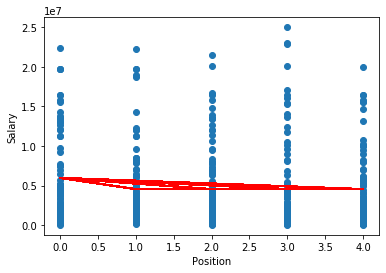

In [488]:
plt.scatter(feature,labels)
plt.plot(feature,dtr.predict(feature),c='r')
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

SVR

In [489]:
from sklearn.svm import SVR
svr = SVR(kernel='poly', C=10.0)
svr.fit(feature,labels)

E:\ANACONDA\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

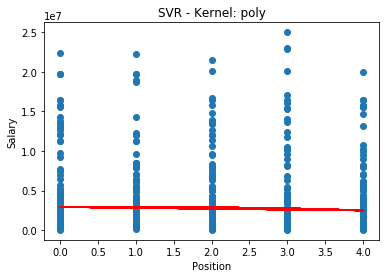

In [490]:
plt.scatter(feature,labels)
plt.plot(feature,svr.predict(feature),c='r')
plt.title("SVR - Kernel: poly")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [491]:

print("R^2 score for SVR: ", svr.score(feature,labels))

R^2 score for SVR:  -0.14481044107620433
